<p style="text-align: center; font-size:50px;">Transformation & Augmentation of Images for Computer Vision Tasks</p>

#### In this notebook, I will be talking about transformation and augmentation of images, the importance of it for Computer Vision tasks, how to implement them and the performance of it. 
#### So let's dive in!

<p style="text-align: center; font-size:30px;">What is Transformation & Augmentations?</p>

#### So what are they?
#### Basically, we are distorting, altering, adding noise, tilting, rotating images. 
#### You might ask **why** we wish to do so. 
#### As we all know, Deep Learning requires a ton of data, even more than traditional machine learning. 
#### When it comes to Computer Vision tasks, the more the data, the more robust our model can be. 
#### With more images, our model can learn more from them.
#### However, people who have dipped into the world of Deep Learning are aware that obtaining these data is the hardest part and even obtaining a sufficient number of them can be near impossible. 

#### This is where these image transformation and augmentations come into play. 
#### With these techniques, even with a small amount of images, we can alter them so that the model recognises them as new data. 
#### With altered images, the model can obtain new information and patterns from them and learn more from them. 
#### Therefore, transformations and augmentations provide humans the power to artificially create a greater number of data, without actually collecting the data by themselves. 

<p style="text-align: center; font-size:30px;">Type of Transformation & Augmentation</p>

#### Now that we know what they are and the importance, you might be wondering what these techniques actually look like. 
#### There are a handful of these techniques out there but allow me to show you some of them.
#### To list them down, there are simple transformations such as resizing, gray scaling, normalizing, random rotation and so on. 
#### There are more advanced transformations such as Gaussian Noise, Random Erasing and so much more. 
#### Just listing them down won't drive the point home, so allow me to demonstrate some of these techniques on images. 
#### For this notebook, I will be employing the famous CIFAR_10 dataset. 

#### Let's look at a random image from this dataset first.
#### But first, let's download the CIFAR_10 dataset and build some basic functions.

In [24]:
# Importing necessary libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import torch
import torchvision
from torchvision import transforms as tt
from torch import nn
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset as Dataset
from torch.utils.data import DataLoader
from sklearn.utils import shuffle
from tqdm import tqdm
import os
from dotenv import load_dotenv

height, width = 32, 32
batch_size = 128
LR = 0.01

In [2]:
transform = tt.Compose(
    [tt.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
images, labels = next(iter(trainloader))

print(f"Image shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {labels.shape} -> [batch_size]")

Image shape: torch.Size([128, 3, 32, 32]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([128]) -> [batch_size]


#### Everything is working as intended.

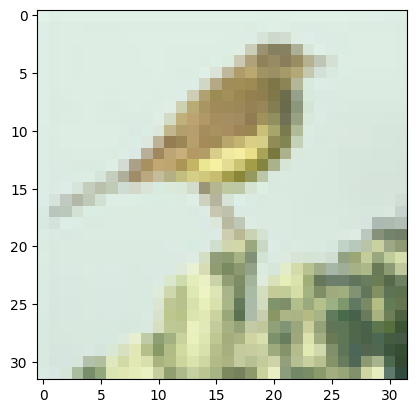

bird 


In [4]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images[:1]))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

#### So the pixels are 32x32 so it's a very blur picture compared to the modern image standard. 
#### However the whole point is just to show you the various transformations. 
#### Allow me to demonstrate.

## Normalizing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


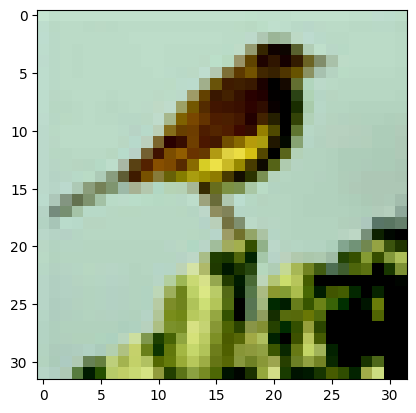

bird 


In [5]:
imshow(torchvision.utils.make_grid(tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(images[:1])))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

#### This [normalization](https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html) takes in input of 3 mean values and 3 standard deviation values. This transformation will then normalize the 3 channels based on these 3 pairs of values. 

## Random Rotation

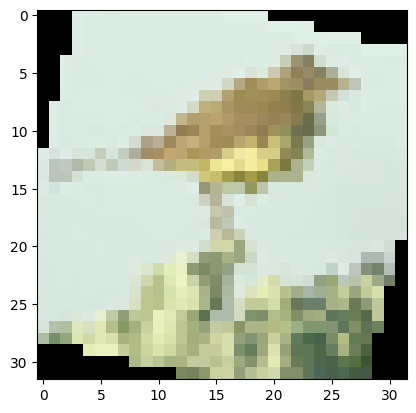

bird 


In [6]:
imshow(torchvision.utils.make_grid(tt.RandomRotation(degrees=(0,360))(images[:1])))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

#### As the name suggests, this transformation will apply a rotation based on the *degrees* parameter. 
#### This parameter can take in a specific angle of rotation or a range of value (min,max) from which to choose the degree of rotation. 

## Random Crop

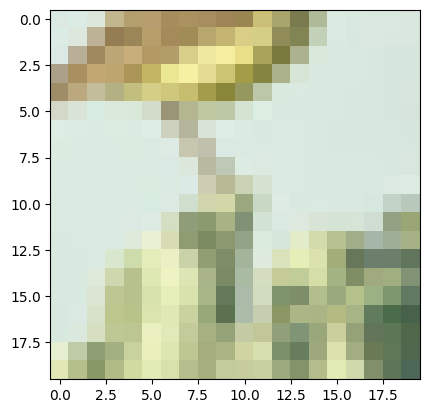

bird 


In [7]:
imshow(torchvision.utils.make_grid(tt.RandomCrop(size=20)(images[:1])))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

#### This is also pretty intuitive. 
#### Random Cropping will crop the image into the desired size, which in this case I have specified it to be 20x20 image. 
#### This is highly useful for images where majority of the pixels are taken up by useless background noise. 

## Gaussian Blur

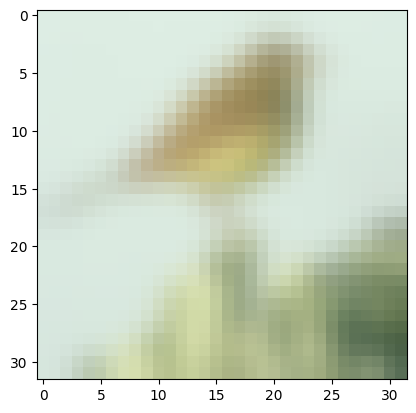

bird 


In [8]:
imshow(torchvision.utils.make_grid(tt.GaussianBlur(kernel_size=31)(images[:1])))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

#### This method transforms the image using a Gaussian Kernel.
#### Mathematically, we are just applying the Gaussian function to calculate the transformation to apply for each pixel. 
#### Visually, we will obtain a less clear, blur image. 
#### This is extremely helpful for the image to generalize instead of overfit and can even obtain new patterns. 

## Gaussian Noise

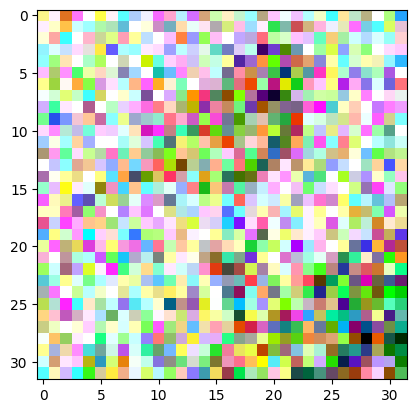

bird 


In [9]:
def add_noise(inputs,noise_factor=0.3):
     noisy = inputs+torch.randn_like(inputs) * noise_factor
     noisy = torch.clip(noisy,0.,1.)
     return noisy

imshow(torchvision.utils.make_grid(add_noise(images[:1])))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

#### Now this is one of the more advanced techniques. 
#### This is a technique where add some noise into the image sampled from a normal distribution, Gaussian distribution.
#### After injecting these random noise, we will clip the values into the range of 0 and 1. 
#### The noise_factor is the magnitude of how noisy we want the image to be. 
#### Adding these noises into the images will defintely help the model to generalize better but with too much noise, it will fail to pick out the necessary patterns and learn from the images. 

## Random Erasing

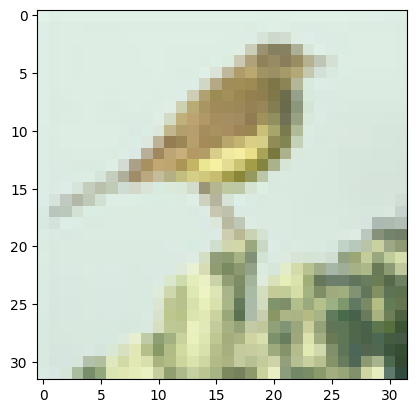

bird 


In [10]:
imshow(torchvision.utils.make_grid(tt.RandomErasing()(images[:1])))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

#### As you can see, there is a random erased block right in the middle. 
#### This transformation will remove certain portion of the image based on a certain probability. 

#### As we can see, there are a ton of various techniques out there to transform our images. 
#### Now allow me to show you how we can utilize these techniques to obtain more images for our training set. 

<p style="text-align: center; font-size:30px;">Obtaining more data through Transformation and Augmentation</p>

In [11]:
load_dotenv()
path_to_image = os.getenv('CIFAR_10_PATH_FILE')

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

batch_1 = unpickle(path_to_image + 'data_batch_1')
batch_1_data = batch_1['data']
batch_1_labels = batch_1['labels']

batch_2 = unpickle(path_to_image + 'data_batch_2')
batch_2_data = batch_2['data']
batch_2_labels = batch_2['labels']

batch_3 = unpickle(path_to_image + 'data_batch_3')
batch_3_data = batch_3['data']
batch_3_labels = batch_3['labels']

batch_4 = unpickle(path_to_image + 'data_batch_4')
batch_4_data = batch_4['data']
batch_4_labels = batch_4['labels']

batch_5 = unpickle(path_to_image + 'data_batch_5')
batch_5_data = batch_5['data']
batch_5_labels = batch_5['labels']

test_set = unpickle(path_to_image + 'test_batch')

all_batch = np.concatenate((batch_1_data, batch_2_data, batch_3_data, batch_4_data, batch_5_data))
all_labels = np.concatenate((batch_1_labels, batch_2_labels, batch_3_labels, batch_4_labels, batch_5_labels))

data = {'data': all_batch, 'labels': all_labels}

In [12]:
data['data'].shape

(50000, 3072)

#### So currently we have 50,000 images. 
#### Let's apply some transformation to these and obtain more image data. 

Text(0.5, 1.0, '2')

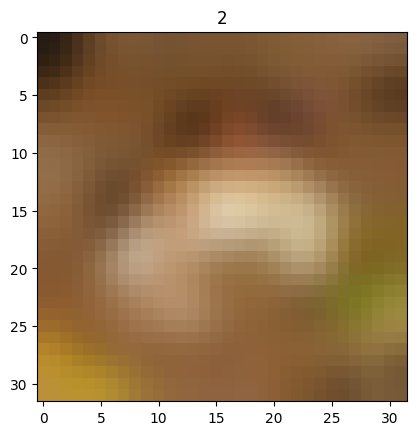

In [13]:
label_name = batch_1['labels']

image = batch_1['data'][0]

label = batch_1['labels'][0]

image = image.reshape(3,32,32)
image = tt.GaussianBlur(kernel_size=31)(torch.from_numpy(image))
image = image.numpy()

image = image.transpose(1,2,0)

plt.imshow(image)
plt.title(label_name[label])

#### As you can see, we can perform these transformation to images and add on to them our existing data. 
#### I will be performing random flipping and random flipping to obtain more different images to train on.

In [15]:
for i in tqdm(range(50000)):
    image = data['data'][i]
    label = data['labels'][i]

    # Each has a default values of p = 0.5
    image_transformed = tt.RandomErasing()(tt.RandomHorizontalFlip()(torch.from_numpy(image.reshape(3,32,32)))).numpy().reshape(3072,)
    # Checking whether image has been transformed; if not, we will not add the image to the data
    if np.array_equal(image_transformed, image) == True:
        continue

    data['data'] = np.append(data['data'], [image_transformed], axis = 0)
    data['labels'] = np.append(data['labels'], [label], axis = 0)

print(f"Now we have {data['data'].shape[0]} number of images")

100%|██████████| 50000/50000 [57:19<00:00, 14.54it/s]   

Now we have 87572 number of images


#### Now as we can see, we have 37,572 more images, thanks to the transformations. 
#### This is mathematically sound as the probabilities of transformations were 50% each, thus the probability of transforming a single random image was 0.5 + 0.5*0.5 = 0.75. 
#### 75% of 50,000 is indeed 37,500. 
#### With some simple transformations, we were able to obtain 75% more data. 
#### For the cherry on top, let us conclude by training a simple data on this transformed images. 

<p style="text-align: center; font-size:30px;">Training</p>

#### Let's prepare the data so that we can feed them into our model.

In [21]:
simple_transform = tt.Compose([
    tt.ToPILImage(),
    tt.Resize((height, width)),
    tt.ToTensor()
])

# Creating custom dataset

class CIFAR10(Dataset):
    def __init__(self, data_dict, transform):
        self.data_dict = data_dict
        self.transform = transform
        
        labels = self.data_dict['labels']
        
    def __len__(self):
        return len(self.data_dict['labels'])
    
    def __getitem__(self, idx):
        
        img = self.data_dict['data'][idx]
        label = self.data_dict['labels'][idx]

        img = torch.tensor(img.reshape(3,height,width), dtype=torch.float)

        if not isinstance(label,np.int64):
            label = torch.tensor(label, dtype=torch.float)
            
        return self.transform(img), label

train_dataloader = CIFAR10(data, transform = simple_transform)
test_dataloader = CIFAR10(test_set, transform = simple_transform)

print(f"We have {len(train_dataloader)} training datapoints and {len(test_dataloader)} testing datapoints\n")

BATCH_SIZE = 128

# Creating custom dataloaders

train_dataloader_custom = DataLoader(dataset=train_dataloader, 
                                     batch_size=BATCH_SIZE, 
                                     # num_workers=2,
                                     shuffle=True) 

test_dataloader_custom = DataLoader(dataset=test_dataloader, 
                                    batch_size=BATCH_SIZE, 
                                    # num_workers=2, 
                                    shuffle=False) 

# Checking if everything works properly

image, label = next(iter(train_dataloader_custom))

print(f"Image shape: {image.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape} -> [batch_size]")

We have 87572 training datapoints and 10000 testing datapoints

Image shape: torch.Size([128, 3, 32, 32]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([128]) -> [batch_size]


#### Let's build up a simple CNN model.

In [26]:
device = torch.device('mps')

class Basic_CNN(nn.Module):
    def __init__(self, input_shape, hidden_shape, output_shape):
        super().__init__()
        self.conv_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_shape, 3, 1, 1), # hidden * 32 * 32
            nn.ReLU(),
            nn.Conv2d(hidden_shape, hidden_shape, 3, 1, 1), # hidden * 32 * 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, # hidden * 16 * 16 
                         stride=2)
        )
        
        self.conv_2 = nn.Sequential(
            nn.Conv2d(hidden_shape, hidden_shape, 3, 1, 1), # hidden * 16 * 16 
            nn.ReLU(),
            nn.Conv2d(hidden_shape, hidden_shape, 3, 1, 1), # hidden * 16 * 16 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, # hidden * 8 * 8 
                         stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_shape * 8 * 8, output_shape)
        )
        
    def forward(self, x):
        return self.classifier(self.conv_2(self.conv_1(x)))
    
torch.manual_seed(42)
basic_model = Basic_CNN(3,32,10)
basic_model.to(device)

Basic_CNN(
  (conv_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=10, bias=True)
  )
)

#### Let's define our optimizers and loss function and initiate the training loop!

In [27]:
lf = nn.CrossEntropyLoss() # Adding the sigmoid function as well
optimizer = torch.optim.SGD(params = basic_model.parameters(), lr = LR)

epochs = 100
train_loss_arr = []
test_loss_arr = []
test_accuracy_arr = []

for epoch in tqdm(range(epochs)):
    train_loss = 0
    
    for batch, (X,y) in enumerate(train_dataloader_custom):
        X = X.to(device)
        y = y.to(device)
        basic_model.train()
                
        # Forward
        y_pred = basic_model(X)
        
        # Calculate loss
        loss = lf(y_pred,torch.tensor(y, dtype=torch.long))
        train_loss += loss
        
        # Zero grad
        optimizer.zero_grad()
        
        # Loss backward
        loss.backward()
        
        # Optimizer step
        optimizer.step()
    
    train_loss/=len(train_dataloader_custom)
    train_loss_arr.append(train_loss.cpu().detach().numpy())
    
    test_loss, test_acc= 0, 0
    basic_model.eval() 
    with torch.inference_mode():
        for batch, (X,y) in enumerate(test_dataloader_custom):

            X = X.to(device)
            y = y.to(device)
            
            # Forward
            test_pred = basic_model(X)
            
            # Calculate loss 
            test_loss += lf(test_pred, torch.tensor(y, dtype=torch.long))

            # Calculate test accuracy 
            test_acc += ((int(torch.sum(torch.argmax(test_pred, dim=1) == y))/BATCH_SIZE)*100)
            
            
        test_loss /= len(test_dataloader_custom)
        test_acc /= len(test_dataloader_custom)
        test_loss_arr.append(test_loss.cpu().detach().numpy())
        test_accuracy_arr.append(test_acc)

    if epoch % 10 == 0:
        print(f"\nEpoch: {epoch} | Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")


  1%|          | 1/100 [00:10<16:38, 10.08s/it]


Epoch: 0 | Train loss: 2.30201 | Test loss: 2.29999 | Test Accuracy: 10.17%



 11%|█         | 11/100 [01:47<14:20,  9.67s/it]


Epoch: 10 | Train loss: 1.47497 | Test loss: 1.43796 | Test Accuracy: 46.31%



 21%|██        | 21/100 [03:24<12:39,  9.61s/it]


Epoch: 20 | Train loss: 1.07189 | Test loss: 1.05952 | Test Accuracy: 62.16%



 31%|███       | 31/100 [05:00<11:02,  9.61s/it]


Epoch: 30 | Train loss: 0.88472 | Test loss: 1.04442 | Test Accuracy: 63.84%



 41%|████      | 41/100 [06:36<09:28,  9.64s/it]


Epoch: 40 | Train loss: 0.77628 | Test loss: 1.04819 | Test Accuracy: 64.50%



 51%|█████     | 51/100 [08:17<08:21, 10.23s/it]


Epoch: 50 | Train loss: 0.69982 | Test loss: 0.94892 | Test Accuracy: 67.38%



 61%|██████    | 61/100 [09:59<06:37, 10.19s/it]


Epoch: 60 | Train loss: 0.64739 | Test loss: 0.96841 | Test Accuracy: 67.66%



 71%|███████   | 71/100 [11:41<04:59, 10.33s/it]


Epoch: 70 | Train loss: 0.60129 | Test loss: 0.82259 | Test Accuracy: 72.43%



 81%|████████  | 81/100 [13:28<03:24, 10.77s/it]


Epoch: 80 | Train loss: 0.56456 | Test loss: 0.81869 | Test Accuracy: 72.68%



 91%|█████████ | 91/100 [15:16<01:37, 10.84s/it]


Epoch: 90 | Train loss: 0.53019 | Test loss: 0.91744 | Test Accuracy: 70.98%



100%|██████████| 100/100 [16:55<00:00, 10.16s/it]


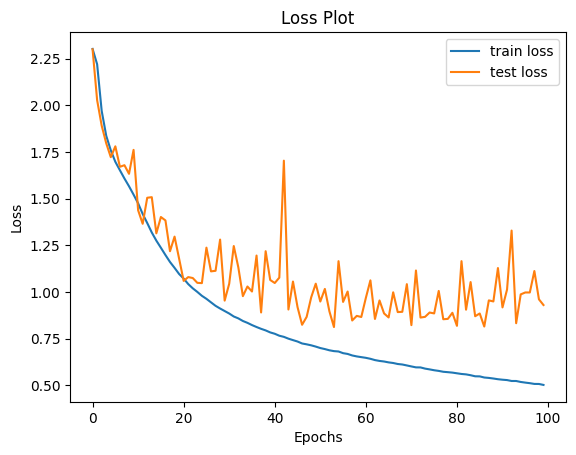

In [29]:
plt.plot([i for i in range(epochs)], train_loss_arr, label='train loss')
plt.plot([i for i in range(epochs)], test_loss_arr, label='test loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### If you saw my other notebook about the same CIFAR_10 dataset, you would have noticed that we were not able to reach such good accuracy results. 
#### This could be due to the fact that we trained on more images and that the model learned new patterns and learned to generalize better. 
#### I believe with a lower learning rate, we would have a less turbulent loss graph and could potentially to the global optimal value.

<p style="text-align: center; font-size:30px;">Conclusion</p>

#### I hope with this notebook, you were able to realize the importance and power of transformation and augmentation of data. 
#### It not only provides us with more data to feed into our model, but provides our model more power to generalize to the overall data. 
#### Give this a go and try to utilize other transformation techniques too!